# Top 1,000 YouTubers Statistics Analysis

The dataset is from [Kaggle Data](https://www.kaggle.com/datasets/computingvictor/top1000youtubers). It contains statistics of top YouTube streamers using the HypeAuditor platform.

In this exercise, the statistics is analyzed to answer the following questions:
* What are the most popular content categories? Is there any different trends for different regions?
* How are the statistics, visits, likes, comments and suscribers, vary for different content categories and different regions?
* How are statistics, visits, likes and comments, distributed among different tiers of youtubers based on their suscriber numbers?  
* Is there any clear correlation between statistics, such as Visits, Likes, Comments and suscribers?

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load in Raw Data

In [2]:
# read in the data
raw = pd.read_csv('youtubers_df.csv')
raw.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
raw.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [4]:
# check the raw data info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
# check the numerical columns
raw.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [6]:
# check `Categories` column
raw.Categories.value_counts()

Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehículos      

## Data Wrangling

In [7]:
# there are too many categories for our analysis
# need to combine different small categories to large ones
raw['Catogories_Modify'] = raw.Categories.str.replace(r'^Animación.*', 'Animación', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Películas.*', 'Películas', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Música y baile.*', 'Música y baile', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Videojuegos.*', 'Videojuegos', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Juguetes.*', 'Juguetes', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Educación.*', 'Educación', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Comida y bebida.*', 'Comida y bebida', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^ASMR.*', 'ASMR', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Fitness.*', 'Fitness', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^DIY y Life Hacks.*', 'DIY y Life Hacks', regex = True)
raw['Catogories_Modify'] = raw.Catogories_Modify.str.replace(r'^Diseño/arte.*', 'Diseño/arte', regex = True)
raw['Catogories_Modify'] = raw['Catogories_Modify'].fillna('Unknown')
# check the categories again
raw.Catogories_Modify.value_counts()

Unknown                 306
Música y baile          224
Películas               136
Animación               113
Videojuegos              39
Vlogs diarios            37
Noticias y Política      36
Educación                26
Juguetes                 15
Ciencia y tecnología     14
Comida y bebida          14
Humor                    10
Deportes                  8
Fitness                   5
DIY y Life Hacks          4
Diseño/arte               3
Animales y mascotas       2
ASMR                      2
Moda                      2
Coches y vehículos        2
Belleza, Moda             1
Viajes, Espectáculos      1
Name: Catogories_Modify, dtype: int64

In [8]:
# just list top catogories
top_cats = ['Música y baile', 'Películas', 'Animación', 'Unknown']
raw['Catogories_5'] = raw.Catogories_Modify
raw.loc[~raw['Catogories_5'].isin(top_cats), 'Catogories_5'] = 'Others'
raw.Catogories_5.value_counts()

Unknown           306
Música y baile    224
Others            221
Películas         136
Animación         113
Name: Catogories_5, dtype: int64

In [9]:
raw.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Catogories_Modify,Catogories_5
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,Música y baile,Música y baile
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,Videojuegos,Others
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,Educación,Others
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,Unknown,Unknown
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,Animación,Animación


In [10]:
# next check `Country` column
raw.Country.value_counts()

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: Country, dtype: int64

In [12]:
# create a region related new column indicating if the region is US or not US
raw['US_or_Not'] = False
raw.loc[raw['Country'] == 'Estados Unidos', 'US_or_Not'] = True
raw.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Catogories_Modify,Catogories_5,Suscribers_MM,US_or_Not
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,Música y baile,Música y baile,249.5,False
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,Videojuegos,Others,183.5,True
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,Educación,Others,165.5,False
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,Unknown,Unknown,162.6,False
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,Animación,Animación,113.5,False


In [11]:
# change the unit of subscribers to million
raw['Suscribers_MM'] = raw['Suscribers'] / 1000000
raw.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Catogories_Modify,Catogories_5,Suscribers_MM
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,Música y baile,Música y baile,249.5
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,Videojuegos,Others,183.5
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,Educación,Others,165.5
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,Unknown,Unknown,162.6
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,Animación,Animación,113.5


what are the most populat catogories

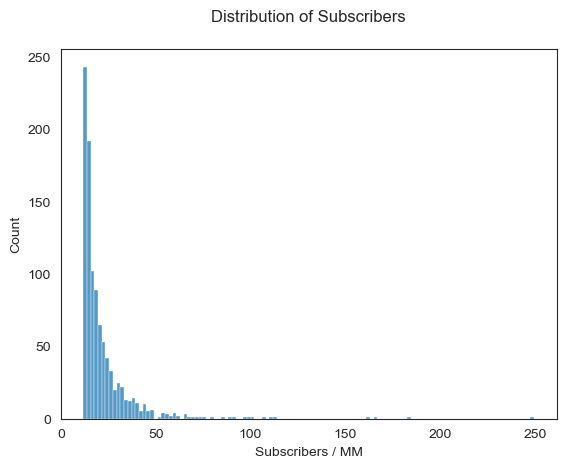

In [170]:
# next let's take a look at suscribers data
sns.histplot(data = raw.Suscribers_MM)
plt.title('Distribution of Subscribers', pad = 20)
plt.xlabel('Subscribers / MM')
plt.show()

In [14]:
# we divide the streamers into tiers based on the suscriber numbers
bins = [10, 20, 30, 40, 50, np.inf]
labels = ['10-20 MM', '20-30 MM', '30-40 MM', '40-50 MM', '>50 MM']

raw['Suscribers_Tiers'] = pd.cut(raw.Suscribers_MM, right = True,  labels = labels, bins = bins)
raw.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Catogories_Modify,Catogories_5,Suscribers_MM,US_or_Not,Suscribers_Tiers
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...,Unknown,Unknown,11.7,True,10-20 MM
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...,Unknown,Unknown,11.7,False,10-20 MM
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,Música y baile,Música y baile,11.7,False,10-20 MM
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...,Unknown,Unknown,11.7,False,10-20 MM
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...,Noticias y Política,Others,11.7,False,10-20 MM


## Exploratory Data Analysis

### Let's look at the 1st question:
* What are the most popular content categories? Is there any different trends for different regions?

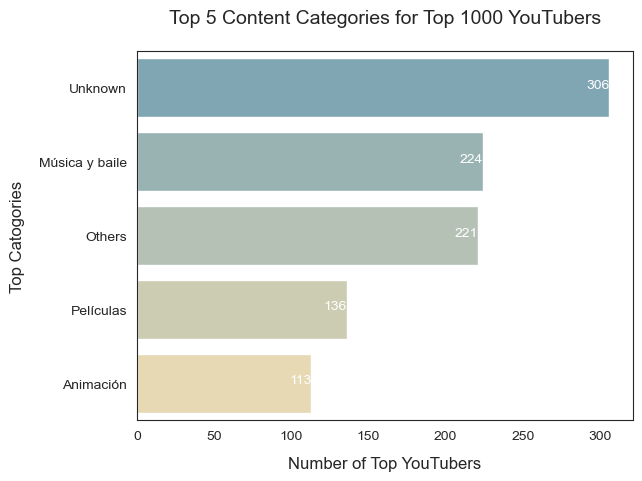

In [163]:
# plot the top trending content categories in the raw data
cats_counts = raw.Catogories_5.value_counts()
cats_counts

sns.set_style('white')
ax = sns.countplot(y = raw.Catogories_5, order = cats_counts.index, palette = 'blend:#7AB,#EDA')

# add anotation
for p in ax.patches:
    height = p.get_width()
    ax.text(height, p.get_y() + p.get_height() / 2.,
            '{:d}'.format(int(height)), ha = 'right', color = 'white') 
    
plt.ylabel('Top Catogories', fontsize = 12, labelpad = 10)
plt.xlabel('Number of Top YouTubers', fontsize = 12, labelpad = 10)
plt.title('Top 5 Content Categories for Top 1000 YouTubers', fontsize = 14, pad = 20)
plt.show()

**The most popular categories are:**

    1. Music and Dance
    2. Films 
    3. Animation

**If a product's targets are fans of the fields above, YouTube is a good place for advertising and other marketing campaigns.**

Assume the interest is in US, let's find out if the trend is the same or not for US and other countries.

In [32]:
# let's first check all the combines categories for US
raw.loc[raw['US_or_Not'] == True, 'Catogories_Modify'].value_counts()

Música y baile          70
Unknown                 67
Animación               41
Películas               27
Videojuegos             23
Comida y bebida         10
Ciencia y tecnología     8
Deportes                 8
Vlogs diarios            7
Noticias y Política      5
Educación                4
Humor                    4
Fitness                  4
Diseño/arte              3
DIY y Life Hacks         3
Juguetes                 2
Animales y mascotas      2
ASMR                     2
Belleza, Moda            1
Moda                     1
Coches y vehículos       1
Name: Catogories_Modify, dtype: int64

In [45]:
# though the top 4 categories remain the same for US and Non-US
# the trend in numbers is different
# let's create a cross table for detailed comparison

crosst = pd.crosstab(raw['Catogories_Modify'], raw['US_or_Not']).sort_values(by=[True], axis = 0, ascending = False)
crosst.head(8)

US_or_Not,False,True
Catogories_Modify,,
Música y baile,154,70
Unknown,239,67
Animación,72,41
Películas,109,27
Videojuegos,16,23
Comida y bebida,4,10
Ciencia y tecnología,6,8
Deportes,0,8


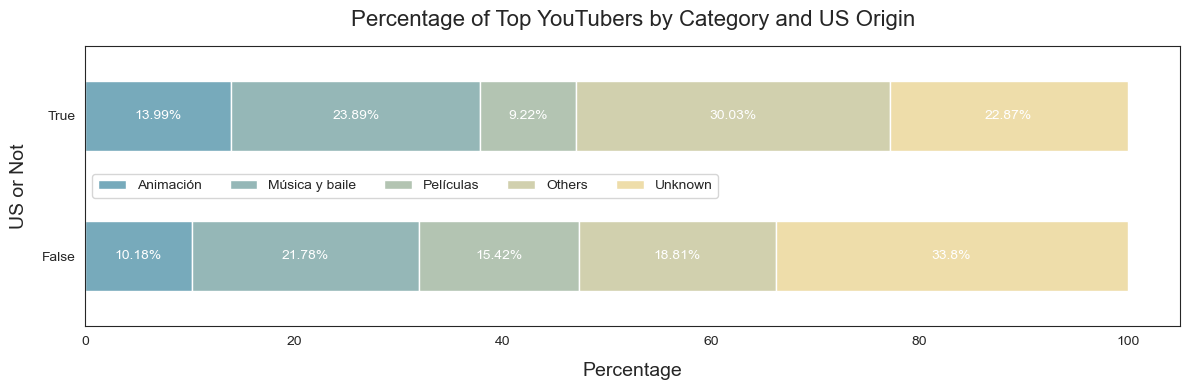

In [169]:
# Create a crosstab table
ct = pd.crosstab(raw['Catogories_5'], raw['US_or_Not']).transpose()

# Convert counts to percentages
ct_percentage = ct.div(ct.sum(axis=1), axis=0) * 100

# Move 'Others' and 'Unknown' to the end
cols_to_move = ['Others', 'Unknown']
ct_percentage = ct_percentage[[col for col in ct_percentage if col not in cols_to_move] + cols_to_move]

# Plot the stacked bar chart
colors = sns.blend_palette(["#7AB", "#EDA"], n_colors=len(ct_percentage.columns))
ax = ct_percentage.plot(kind='barh', stacked=True, figsize=(12, 4), color = colors)
plt.title("Percentage of Top YouTubers by Category and US Origin", fontsize = 16, pad = 14)
plt.xlabel("Percentage", fontsize = 14, labelpad = 10)
plt.ylabel("US or Not", fontsize = 14, labelpad = 10)

# add annotation
for i, category in enumerate(ct_percentage.index):
    y_offset_category = 0
    for col in ct_percentage.columns:
        value = round(ct_percentage.at[category, col], 2) # Get value from ct_percentage
        ax.text(y_offset_category + value/2, i, str(value) + "%", ha="center", va="center", color="white")
        y_offset_category += value
ax.legend(loc = 'center left', ncol = 5)
plt.tight_layout()
plt.show()

From the plot above:
* Music and Dance youtube videos are the most popular ones for US and other countries.
* Youtube videos on films are less popular in US compared to other countries.
* Youtube videos on animation are more popular in US compared to other countries.
* Videos marked as 'Others' gain larger percentage for US creators. There are a larger variety contents for US youtube videos. 

**The popylar content categories trend is slighlty different between US and other countries.**

**Different marketing strategies should be made with between US streamers and Non-US streamers.** 

### Let's look at the 2nd question:
* How are the statistics, visits, likes, comments and suscribers, vary for different content categories and different regions?

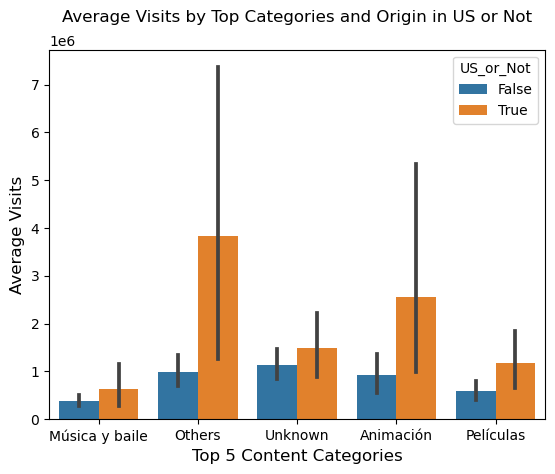

In [103]:
sns.barplot(data = raw, y = 'Visits', x = 'Catogories_5', hue = 'US_or_Not')
plt.title('Average Visits by Top Categories and Origin in US or Not', pad = 20)
plt.xlabel('Top 5 Content Categories', fontsize = 12)
plt.ylabel('Average Visits', fontsize = 12)
plt.show()

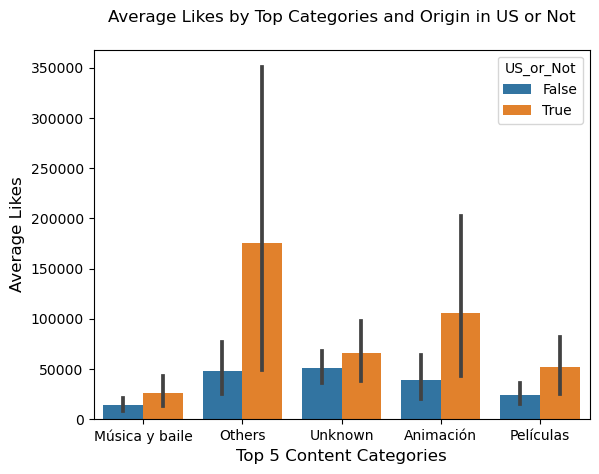

In [104]:
sns.barplot(data = raw, y = 'Likes', x = 'Catogories_5', hue = 'US_or_Not')
plt.title('Average Likes by Top Categories and Origin in US or Not', pad = 20)
plt.xlabel('Top 5 Content Categories', fontsize = 12)
plt.ylabel('Average Likes', fontsize = 12)
plt.show()

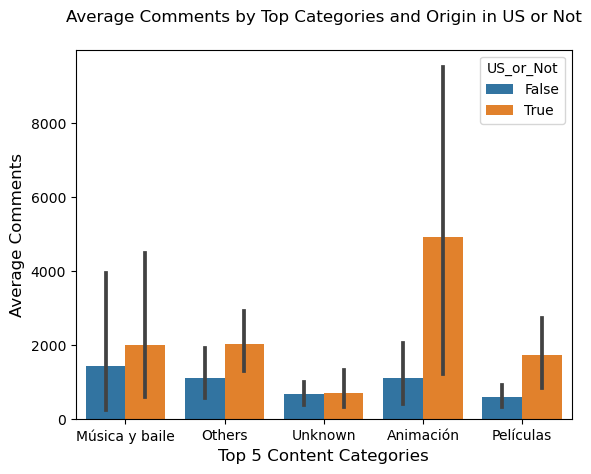

In [105]:
sns.barplot(data = raw, y = 'Comments', x = 'Catogories_5', hue = 'US_or_Not')
plt.title('Average Comments by Top Categories and Origin in US or Not', pad = 20)
plt.xlabel('Top 5 Content Categories', fontsize = 12)
plt.ylabel('Average Comments', fontsize = 12)
plt.show()

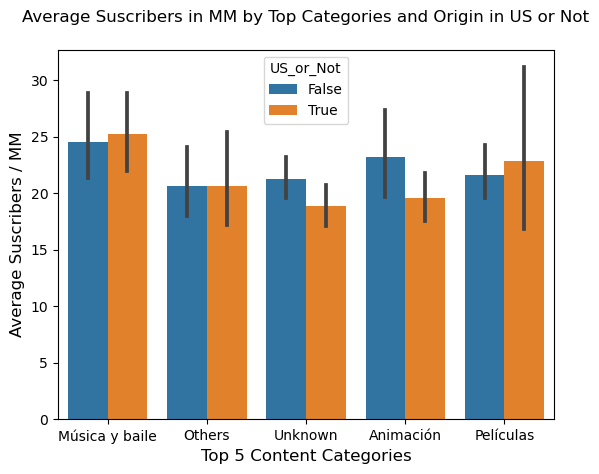

In [106]:
sns.barplot(data = raw, y = 'Suscribers_MM', x = 'Catogories_5', hue = 'US_or_Not')
plt.title('Average Suscribers in MM by Top Categories and Origin in US or Not', pad = 20)
plt.xlabel('Top 5 Content Categories', fontsize = 12)
plt.ylabel('Average Suscribers / MM', fontsize = 12)
plt.show()

* There are more visits, comments and likes for videos created by streamers in US.
* The average suscriber numbers for US streamers and Non-US streamers are comparable. 
* Average likes, comments, visits vary between different video content, especially for US streamers. While suscribers are comparable for different content categories.
    * US Animation videos have audience that love to comment a lot.
    * Overall audience of Animation videos are more active in visits, likes and comments on their favorite channels. 

### Let's look at the 3rd question:
* How are statistics, visits, likes and comments, distributed among different tiers of youtubers based on their suscriber numbers?  

In [107]:
# check the counts of different tiers
raw.Suscribers_Tiers.value_counts()

10-20 MM    639
20-30 MM    210
30-40 MM     82
>50 MM       38
40-50 MM     31
Name: Suscribers_Tiers, dtype: int64

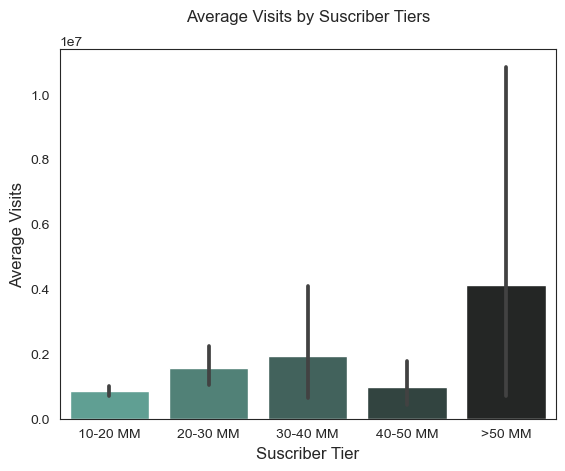

In [171]:
# plot the average visits
sns.set_style('white')
sns.barplot(data = raw, y = 'Visits', x = 'Suscribers_Tiers', palette = 'dark:#5A9_r')
plt.title('Average Visits by Suscriber Tiers', pad = 20)
plt.xlabel('Suscriber Tier', fontsize = 12)
plt.ylabel('Average Visits', fontsize = 12)
plt.show()

In [109]:
# 40-50MM tier has abnormally low averge visits 
# let's double check

raw.groupby('Suscribers_Tiers')['Visits'].agg('mean')

Suscribers_Tiers
10-20 MM    8.444336e+05
20-30 MM    1.550108e+06
30-40 MM    1.918503e+06
40-50 MM    9.828806e+05
>50 MM      4.119579e+06
Name: Visits, dtype: float64

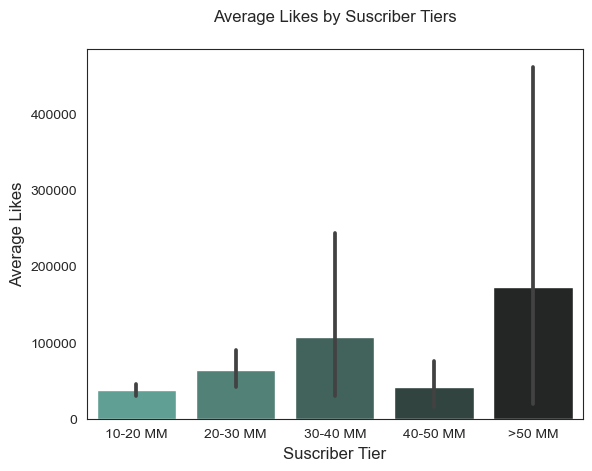

In [172]:
sns.barplot(data = raw, y = 'Likes', x = 'Suscribers_Tiers', palette = 'dark:#5A9_r')
plt.title('Average Likes by Suscriber Tiers', pad = 20)
plt.xlabel('Suscriber Tier', fontsize = 12)
plt.ylabel('Average Likes', fontsize = 12)
plt.show()

In [21]:
raw.groupby('Suscribers_Tiers')['Likes'].agg('mean')

Suscribers_Tiers
10-20 MM     37097.154930
20-30 MM     63329.166667
30-40 MM    106888.475610
40-50 MM     41488.548387
>50 MM      173089.078947
Name: Likes, dtype: float64

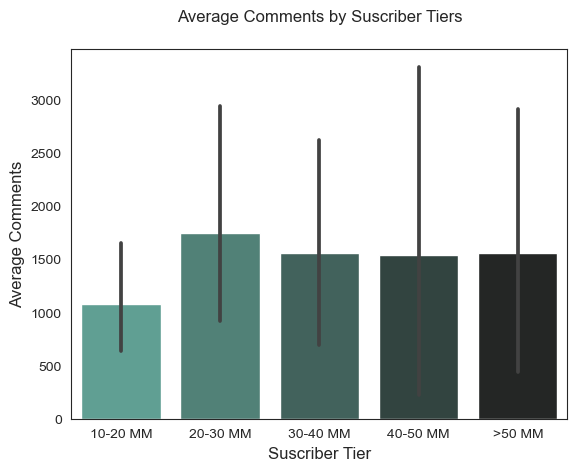

In [173]:
# let's look at comments
sns.barplot(data = raw, y = 'Comments', x = 'Suscribers_Tiers', palette = 'dark:#5A9_r')
plt.title('Average Comments by Suscriber Tiers', pad = 20)
plt.xlabel('Suscriber Tier', fontsize = 12)
plt.ylabel('Average Comments', fontsize = 12)
plt.show()

**Visits and Likes show similar trend among streamers in different suscriber tiers.**
* For streamers with less than 30 MM suscribers, more subscribers mean more visits and likes. The variation is small among different streamers in the same tier. Marketing campaigns in the whole tier groups are reasonable.
* For streamers with more than 30 MM suscribers, visits and likes show higher variations. Therefore, marketing campaigns in the whole tier groups are not smart choices. Targeted campaigns with specific streamers are better choices.
* Visits and likes are unexpected low for streamers with 40-50 MM suscribers. This worth further looked into.

**From the plot above, Comments may not be a good indicator for popularity of a streamer.**
* Comments are overall at simiar level for streamers in different subscriber tiers.
* Variance of comments is high for all tiers.

### Let's look at the last question: 
* Is there any clear correlation between statistics, such as Visits, Likes, Comments and suscribers?

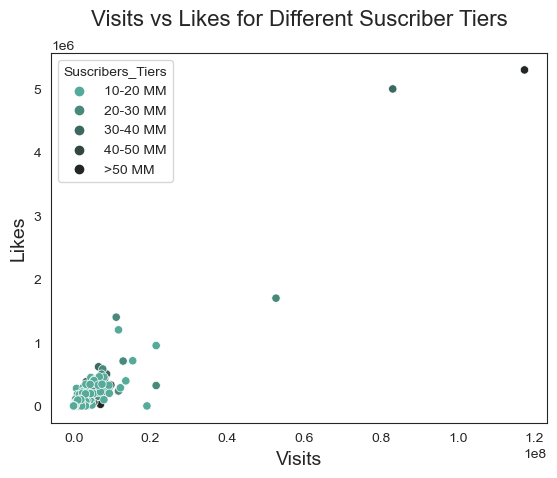

In [154]:
# from previous section, Visits and Likes seem behave similarlly
# let's plot the Visits and Likes
sns.set_style('white')

sns.scatterplot(data = raw, x = 'Visits', y = 'Likes', hue = 'Suscribers_Tiers', palette = 'dark:#5A9_r')
plt.title('Visits vs Likes for Different Suscriber Tiers', fontsize = 16, pad = 20)
plt.xlabel('Visits', fontsize = 14)
plt.ylabel('Likes', fontsize = 14)
plt.show()

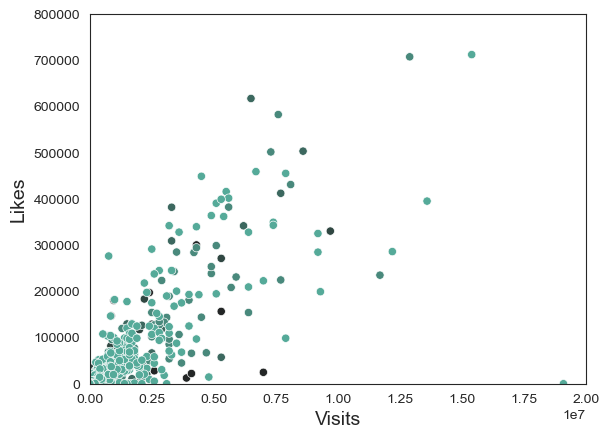

In [156]:
# let's zoom in
sns.scatterplot(data = raw, x = 'Visits', y = 'Likes', hue = 'Suscribers_Tiers', palette = 'dark:#5A9_r', legend = None)
plt.xlim([0, 20000000])
plt.ylim([0, 800000])
plt.xlabel('Visits', fontsize = 14)
plt.ylabel('Likes', fontsize = 14)
plt.show()

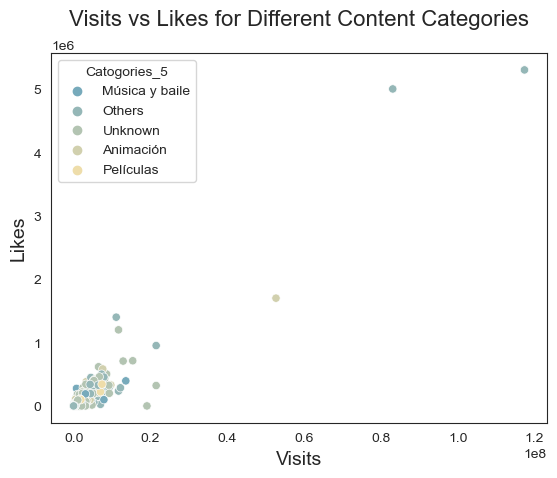

In [155]:
# let's plot the Visits and Likes
sns.scatterplot(data = raw, x = 'Visits', y = 'Likes', hue = 'Catogories_5',  palette = 'blend:#7AB,#EDA')
plt.title('Visits vs Likes for Different Content Categories', fontsize = 16, pad = 20)
plt.xlabel('Visits', fontsize = 14)
plt.ylabel('Likes', fontsize = 14)
plt.show()

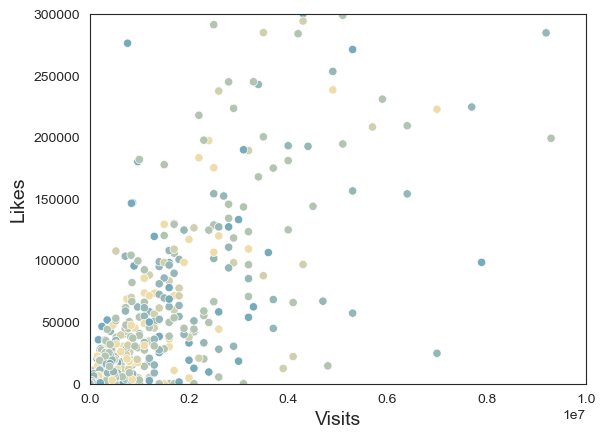

In [157]:
# let's zoom in
sns.scatterplot(data = raw, x = 'Visits', y = 'Likes', hue = 'Catogories_5',  palette = 'blend:#7AB,#EDA', legend = None)
plt.xlim([0, 10000000])
plt.ylim([0, 300000])
plt.xlabel('Visits', fontsize = 14)
plt.ylabel('Likes', fontsize = 14)
plt.show()

**There is a linear trend between Visits and Likes.**